In [ ]:
!pip install mecab-python3 unidic-lite

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.7/581.7 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 MB 20.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for unidic-lite: filename=unidic_lite-1.0.8-py3-none-any.whl size=47658817 sha256=4562cd80c8eab30b146c02c9d8000aa55d0524064042aa2b046a884a71d8285d
  Stored in directory: /root/.cache/pip/wheels/89/e8/68/f9ac36b8cc6c8b3c96888cd57434abed96595d444f42243853
Successfully built unidic-lite


In [ ]:
import MeCab
mecab = MeCab.Tagger()
with open("neko.txt") as f:
  with open("neko.txt.mecab", mode="w") as w:
    for line in f:
      w.write(mecab.parse(line))

In [ ]:
!less neko.txt.mecab

一      イチ    イチ    一      名詞-数詞                       2
EOS
EOS
　                      　      空白                    
吾輩    ワガハイ        ワガハイ        我が輩  代名詞                  0
は      ワ      ハ      は      助詞-係助詞                     
猫      ネコ    ネコ    猫      名詞-普通名詞-一般                      1
で      デ      ダ      だ      助動詞  助動詞-ダ       連用形-一般     
ある    アル    アル    有る    動詞-非自立可能 五段-ラ行       終止形-一般     1
。                      。      補助記号-句点                   
EOS
名前    ナマエ  ナマエ  名前    名詞-普通名詞-一般                      0
は      ワ      ハ      は      助詞-係助詞                     
まだ    マダ    マダ    未だ    副詞                    1
無い    ナイ    ナイ    無い    形容詞-非自立可能       形容詞  終止形-一般     1
。                      。      補助記号-句点                   
EOS
EOS
　                      　      空白                    
どこ    ドコ    ドコ    何処    代名詞                  1
で      デ      デ      で      助詞-格助詞                     
生れ    ウマレ  ウマレル        生まれる        動詞-一般       下一段-ラ行     連用形-一般     0
た      タ      タ      た 

# 30. 形態素解析結果の読み込みPermalink
形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ．

In [ ]:
result = []
sentence = []

with open("neko.txt.mecab") as f:
  for line in f:
    l1 = line.split("\t")
    if l1[0] == "。":
      result.append(sentence)
      sentence = []
    elif len(l1) != 1:
      pos= l1[4].split("-")
      if len(pos) ==1:
        sentence.append({"surface": l1[0], "base": l1[3], "pos": pos[0]})
      else:
        sentence.append({"surface": l1[0], "base": l1[3], "pos": pos[0], "pos1": pos[1]})
result


[[{'surface': '一', 'base': '一', 'pos': '名詞', 'pos1': '数詞'},
  {'surface': '\u3000', 'base': '\u3000', 'pos': '空白'},
  {'surface': '吾輩', 'base': '我が輩', 'pos': '代名詞'},
  {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'},
  {'surface': '猫', 'base': '猫', 'pos': '名詞', 'pos1': '普通名詞'},
  {'surface': 'で', 'base': 'だ', 'pos': '助動詞'},
  {'surface': 'ある', 'base': '有る', 'pos': '動詞', 'pos1': '非自立可能'}],
 [{'surface': '名前', 'base': '名前', 'pos': '名詞', 'pos1': '普通名詞'},
  {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'},
  {'surface': 'まだ', 'base': '未だ', 'pos': '副詞'},
  {'surface': '無い', 'base': '無い', 'pos': '形容詞', 'pos1': '非自立可能'}],
 [{'surface': '\u3000', 'base': '\u3000', 'pos': '空白'},
  {'surface': 'どこ', 'base': '何処', 'pos': '代名詞'},
  {'surface': 'で', 'base': 'で', 'pos': '助詞', 'pos1': '格助詞'},
  {'surface': '生れ', 'base': '生まれる', 'pos': '動詞', 'pos1': '一般'},
  {'surface': 'た', 'base': 'た', 'pos': '助動詞'},
  {'surface': 'か', 'base': 'か', 'pos': '助詞', 'pos1': '終助詞'},
  {'surface': 'と', '

# 31. 動詞Permalink
動詞の表層形をすべて抽出せよ．

In [ ]:
verb_sur =set()

for rlt in result:
  for r in rlt:
    if r["pos"] == "動詞":
      verb_sur.add(r["surface"])
print(verb_sur)

{'恐るる', '済み', 'わら', '滑っ', '舞い戻っ', '渉ら', '鑑みる', '流れる', 'やらし', '突き飛ばし', 'ととのう', '曲る', '引き返し', 'つかん', 'のぼら', '改めれ', 'つぐ', '押し込め', '減れ', '引っ張ら', '償おう', '輝い', '申し', 'かわら', '流行っ', 'じゃらし', 'コセつく', 'いただか', '降りよう', '枯れ', '追い出さ', '分っ', '乱す', '聞く', '返さ', '引込ん', '習い', '転ずる', '働', '売渡す', '馳け廻る', '打ち明ける', 'ぬっ', '齎らし', '向っ', '留まる', 'ぬくもっ', '造ろう', '恃み', '受け合わ', '出る', '見ろ', 'もがけ', '害する', '凋ん', 'ぎり', 'どけ', '呑み', '隠す', '居', '破っ', 'つくろっ', '躍る', '転がっ', 'そらす', 'かま', '振り翳し', '磨り上げる', 'あたら', '言い放っ', '演じ', '止す', '儲け', '逢わ', '押しつけ', '思っ', '括り', '飛び越える', '謡わ', '直す', 'たのま', '聞け', 'きれ', '焦る', '陣取っ', '肥っ', 'つけろ', 'かこう', '洩らさ', 'なぐりつける', '疲らし', '取り扱っ', '照らさ', 'かなう', '見付かる', '恃ん', 'かぶっ', '減り', '召し上がれ', '打ち落す', '添う', '罵しる', 'おり', '運ば', '罹る', '見出し', '聞かし', '丸め', '生れ', '纏める', '積みかさね', '振り', '返えし', '憚かる', '住め', '問い掛ける', '及ぼし', '書き散らし', 'もやる', '投ぜ', '落ち着く', '称え', '剃っ', '譲る', '変ずる', '採る', '案ずる', '畏るる', '似', 'かかり', '攫み', '寄っ', 'あばれ', '塗り消し', '出来', 'たべ', 'いじめ', '窶し', '立っ', '落ちつき', 'かい', '利かし', '褒め', '避ける', '困りゃ', '卜する', '齎らす

# 32. 動詞の基本形Permalink
動詞の基本形をすべて抽出せよ．

In [ ]:
verb_base =set()

for rlt in result:
  for r in rlt:
    if r["pos"] == "動詞":
      verb_base.add(r["base"])
print(verb_base)

{'下ろす', '鑑みる', '祟る', '流れる', '打ち出す', '寄る', '乱す', '聞く', '浮かばれる', '転ずる', '打ち明ける', '掻き込む', '縮む', '突き上げる', '回す', '仄めかす', '出る', '害する', '隠す', '交じる', '磨り上げる', '鍛え上げる', '伸ばす', '止す', '靄る', '飛び越える', '因る', '直す', '焦る', '見付かる', '見知る', '押し掛ける', '捻り出す', '言い付ける', '罹る', '引っ繰り返る', '談ずる', '叩き落とす', '燻る', '纏める', '畏まる', '放り出す', '問い掛ける', '思い及ぶ', '落ち着く', '変ずる', '譲る', '膨れ上がる', '案ずる', '滅入る', 'ちょろまかす', 'いらせられる', '表わす', '避ける', '卜する', '眺め暮らす', '怠る', '流れ出す', '仕上がる', '流す', '窺う', '戯れ付く', '免れる', '日暮れる', '進ぜる', '担う', '仰る', '信ずる', '選ぶ', '焚く', '覚ます', '逃れる', '余る', '伝わる', '施す', '渡る', '爛れる', '磨り潰す', '回らす', '被せる', '羨む', '授ける', '伸し掛かる', '遡る', '怯む', '見届ける', '消え去る', '知れる', '染みる', '投ずる', '脅す', '取り合う', '湧き出でる', '貸す', '呼び立てる', '病む', '勤める', '優れる', '萎びる', '逃がす', '零す', '然り', '尋ね当てる', '陣取る', 'ごろつく', '喋る', '試す', '崇める', '含む', '溜める', '進める', '角張る', '比する', '追い遣る', '食べる', '添える', '押さえる', '剥がれる', '似る', '慰む', '付する', '躓く', '受け取る', '塞ぐ', '触る', '察する', '歌う', '記する', '固める', '言い捨てる', '救い出す', '魘される', '養う', '詰め込む', '打ち取る', '稼ぐ', '巻き付ける', '掛ける', '眠る', '悲

# 33. 「AのB」Permalink
2つの名詞が「の」で連結されている名詞句を抽出せよ．

In [ ]:
noun2noun = set()

for sentence in result:
  for i in range(len(sentence)-2):
    if sentence[i]["pos"] == "名詞" and sentence[i+1]["surface"] == "の" and sentence[i+2]["pos"] == "名詞":
      noun2noun.add(sentence[i]["surface"]+sentence[i+1]["surface"]+sentence[i+2]["surface"])
print(noun2noun)

{'忍びの術', '大鵬の志', '新聞の上', '多少の不便', '自分の境遇', '物理の実験', '近辺のもの', '月の間', '羽織の紐', '体内の各部', '石の団子', '隣家の三毛', '沙汰の体', 'ヴァイオリンの仲間', '尻尾の重み', '東京の呉服', '手足の方', '仏陀の福音', '年廻りのせい', '物体の運動', '隣の穴', '前歯のうち', '正義のため', '相の手', '袴の上', '今の人間', '舌の料理', '一般の湯', '胃の具合', '什麼の交渉', '天の道', 'ところの説', '溷濁の悲境', '互の間', '中心の世', '縮緬の布団', '人口の増殖', '時の通路', '古人の作', '主人の羽織', '坊主の慣用', '脳の作用', '間の枝', '男の口', '垣根の幅', '自己の異名', '英吉利のナイス', 'セオファーノの話し', '法事の時', '蝉の所在', '鏡の前', '沙弥のうち', '暮の事', '鏡花の小説', '侍女の方', '神の全智', '自己の邸内', '客の名前', '厘の湯銭', '伝心の幕', '細工の巻', '個人の人格', '旅順の陥落', '主人の鉄砲', '人の都合', '庭の敷石', '両者の御蔭', '秋の夜長', '今の内', '樽木の交叉', '尻尾の先', '雁の味', '軍隊の凱旋', '程度の労力', '金田のじい', '障子の内', '合の割合', '相思の情', '鼻の恐縮', '肴屋の銀', '柳の下', '度の大礼', '指の尖', '時分の事', '長夜の灯影', '東京の鰻', '消極の積極', '主人の方', '等の功能', '子の身代り', '例の築山', '天下の秀才', '横の筋', '畳の間', '自己の利益', '自分の子', '帯の片側', '肩の上', '日本のスタン', '時の語気', '酒の相手', '八の娘', '人の説明', '主人の尻', '文の材料', '以上の作', '細君の掃除', '祐筆の妹', '人間の同情', '最初のうち', '袋のなか', '暮の二十', 'おもちゃの空気', '談話の局面', '今日の会', '赤松の間', '一種の見地', '小牛のチャップ', '嬢の生活', '

#34. 名詞の連接Permalink
名詞の連接（連続して出現する名詞）を最長一致で抽出せよ．

In [ ]:
import numpy as np
d = {}
text = ""

for line in result:
  for dic in line:
    if dic["pos"] == "名詞":
      text += dic["surface"]
    else:
      d[text] = len(text)
      text = ""

max_length = np.max(np.array(list(d.values())))

print([text for text, len in d.items() if len == max_length])


['Archaiomelesidonophrunicherata']


# 35. 単語の出現頻度Permalink
文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．

In [ ]:
from collections import Counter

wordlist = []

for sentence in result:
  for word in sentence:
    wordlist.append(word["base"])

word_counts = Counter(wordlist)
sort_counts = word_counts.most_common()

print(sort_counts)


[('の', 10265), ('だ', 8134), ('て', 7905), ('、', 6773), ('は', 6514), ('と', 6163), ('を', 6119), ('に', 5746), ('が', 5394), ('た', 4432), ('為る', 3922), ('も', 3238), ('「', 3238), ('」', 3238), ('有る', 2308), ('で', 2216), ('から', 2208), ('か', 2038), ('居る', 1773), ('言う', 1695), ('無い', 1693), ('ず', 1623), ('ない', 1450), ('事', 1272), ('です', 1176), ('ます', 1160), ('物', 1113), ('成る', 1100), ('へ', 997), ('主人', 934), ('御', 858), ('何', 849), ('様', 779), ('ね', 709), ('其れ', 695), ('見る', 694), ('此の', 675), ('—', 666), ('君', 666), ('来る', 622), ('其の', 618), ('ば', 576), ('良い', 539), ('所', 516), ('思う', 516), ('此れ', 513), ('よ', 504), ('一', 488), ('人', 488), ('我が輩', 481), ('れる', 448), ('行く', 440), ('…', 433), ('さ', 419), ('どう', 415), ('\u3000', 411), ('さん', 396), ('時', 394), ('聞く', 383), ('メイテイ', 343), ('遣る', 330), ('って', 327), ('方', 324), ('な', 321), ('まで', 314), ('出来る', 314), ('君-代名詞', 308), ('出る', 306), ('そう', 301), ('上', 298), ('中', 287), ('人間', 279), ('顔', 278), ('ごとし', 278), ('先生', 274), ('くらい', 271), ('僕', 2

# 36. 頻度上位10語
出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

In [ ]:
!pip install japanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 21.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=0c2ec7a4b6e260ec4f9c91ebb31c6e4af7317ecc258fb00edc2906146d9de7f1
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


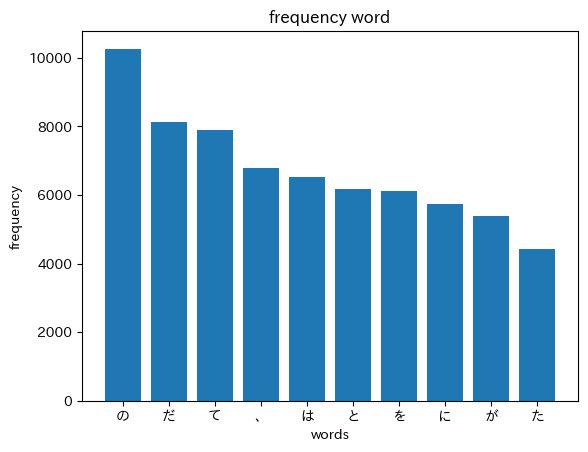

In [ ]:
import matplotlib.pyplot as plt
import japanize_matplotlib
words = [w for i,(w,c) in enumerate(sort_counts) if i<10]
counts = [c for i,(w,c) in enumerate(sort_counts) if i<10]

plt.bar(words,counts)

plt.title("frequency word")
plt.xlabel("words")
plt.ylabel("frequency")

plt.show()

# 37. 「猫」と共起頻度の高い上位10語
「猫」とよく共起する（共起頻度が高い）10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

[('の', 389), ('だ', 322), ('は', 273), ('て', 256), ('、', 253), ('と', 230), ('を', 216), ('に', 209), ('が', 173), ('為る', 154), ('た', 143), ('も', 139), ('有る', 123), ('ず', 76), ('で', 72), ('無い', 66), ('事', 63), ('から', 63), ('居る', 62), ('か', 62), ('我が輩', 58), ('言う', 58), ('ない', 53), ('」', 45), ('「', 43), ('物', 40), ('人間', 39), ('ます', 35), ('此の', 33), ('様', 31), ('成る', 31), ('見る', 30), ('一', 27), ('其の', 25), ('思う', 25), ('れる', 24), ('良い', 23), ('へ', 22), ('ば', 21), ('—', 20), ('何', 20), ('主人', 20), ('\u3000', 19), ('出来る', 18), ('御', 18), ('など', 18), ('くらい', 17), ('人', 17), ('所', 15), ('まで', 15), ('ながら', 14), ('さえ', 14), ('然し', 14), ('どう', 14), ('遣る', 14), ('って', 14), ('より', 14), ('取る', 14), ('上', 13), ('だけ', 13), ('其れ', 13), ('等', 13), ('来る', 12), ('です', 12), ('顔', 11), ('ごとし', 11), ('中', 11), ('ね', 11), ('御座る', 11), ('さ', 11), ('此れ', 10), ('彼', 10), ('べし', 10), ('ほど', 10), ('内', 10), ('二', 10), ('一寸', 10), ('られる', 10), ('分かる', 10), ('到底', 10), ('行く', 10), ('先生', 10), ('こんな', 9), ('家', 9), ('たい

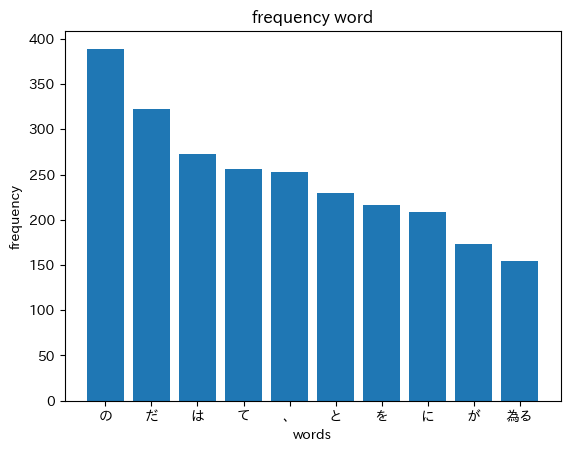

In [ ]:
from collections import Counter

wordlist = []

for sentence in result:
  if any(word["base"] == '猫' for word in sentence):
    for word in sentence:
      if word["base"] != "猫":
        wordlist.append(word["base"])

word_counts = Counter(wordlist)
sort_counts = word_counts.most_common()
print(sort_counts)

import matplotlib.pyplot as plt
import japanize_matplotlib
words = [w for i,(w,c) in enumerate(sort_counts) if i<10]
counts = [c for i,(w,c) in enumerate(sort_counts) if i<10]

plt.bar(words,counts)

plt.title("frequency word")
plt.xlabel("words")
plt.ylabel("frequency")

plt.show()


# 38. ヒストグラム
単語の出現頻度のヒストグラムを描け．ただし，横軸は出現頻度を表し，1から単語の出現頻度の最大値までの線形目盛とする．縦軸はx軸で示される出現頻度となった単語の異なり数（種類数）である．

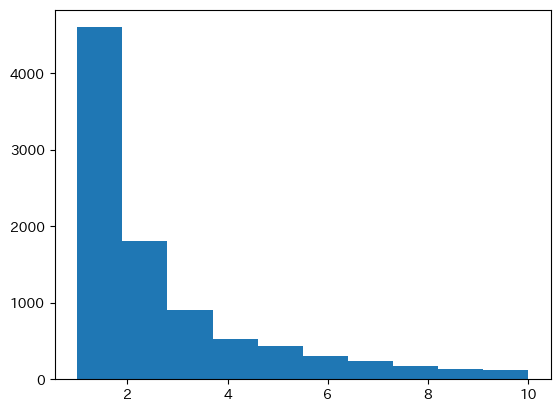

In [ ]:
from collections import Counter

wordlist = []

for sentence in result:
  for word in sentence:
    wordlist.append(word["base"])

word_counts = Counter(wordlist)


plt.hist(word_counts.values(), bins=10, range=(1,10))
plt.show();

# 39. Zipfの法則
単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ．

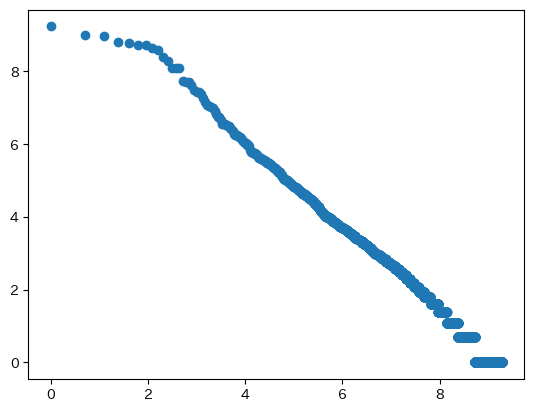

In [ ]:
from collections import Counter

wordlist = []

for sentence in result:
  for word in sentence:
    wordlist.append(word["base"])

word_counts = Counter(wordlist)
sort_counts = word_counts.most_common()

counts = [c for _,c in sort_counts]

import numpy as np

plt.scatter(np.log(range(1, len(counts)+1)), np.log(counts))
plt.show();